<a href="https://colab.research.google.com/github/hannahgz/BenchmarkRCStrategies/blob/master/FigGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIG_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIG_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIG_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title

{'Siamese', 'NAugWithin', 'RCSumPoolBias', 'AugOut100', 'AugOutDouble', 'Standard', 'AugWithin', 'NAugOut100', 'NStandard', 'RCWeight', 'NAugOutDouble', 'RCSumPool'}


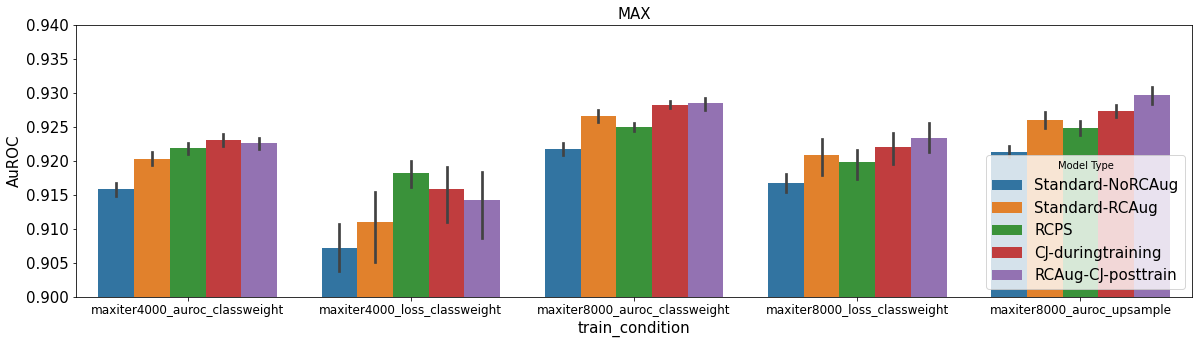

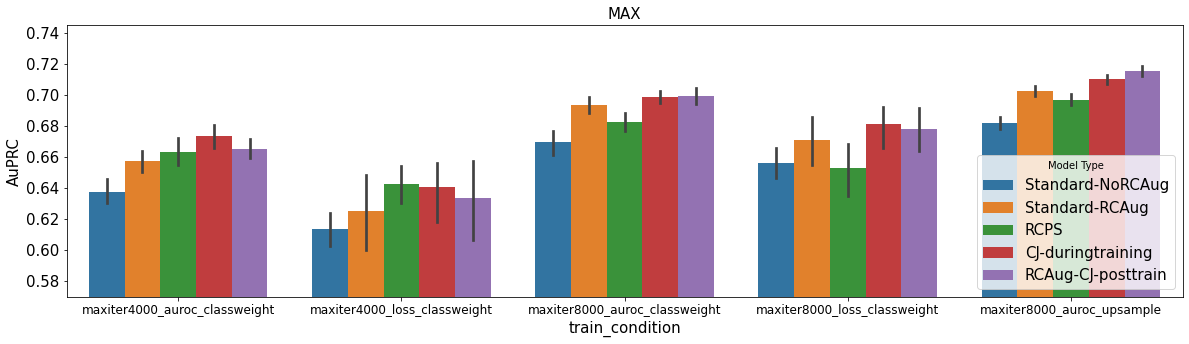

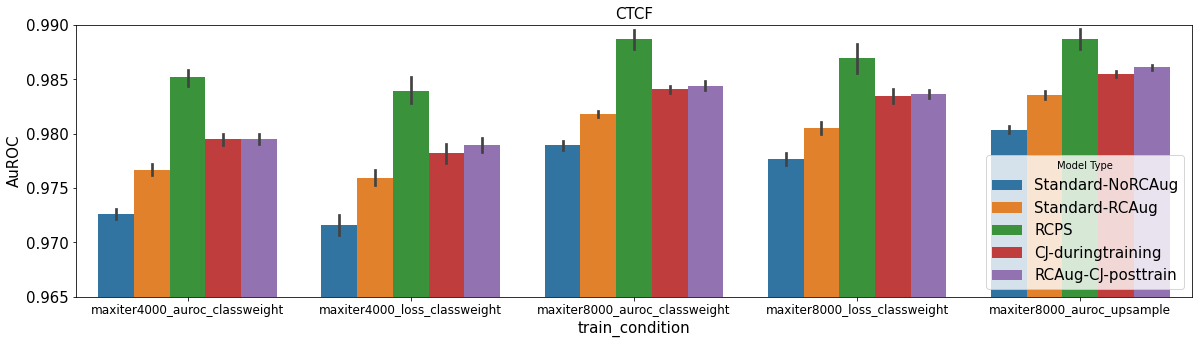

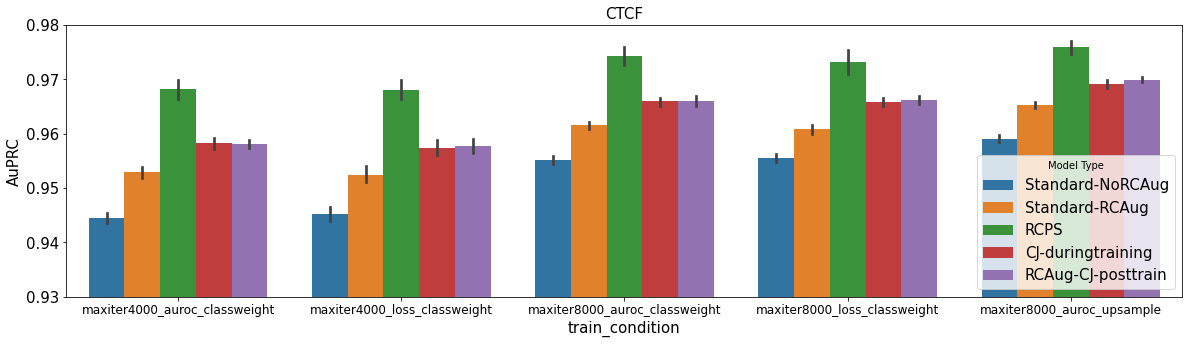

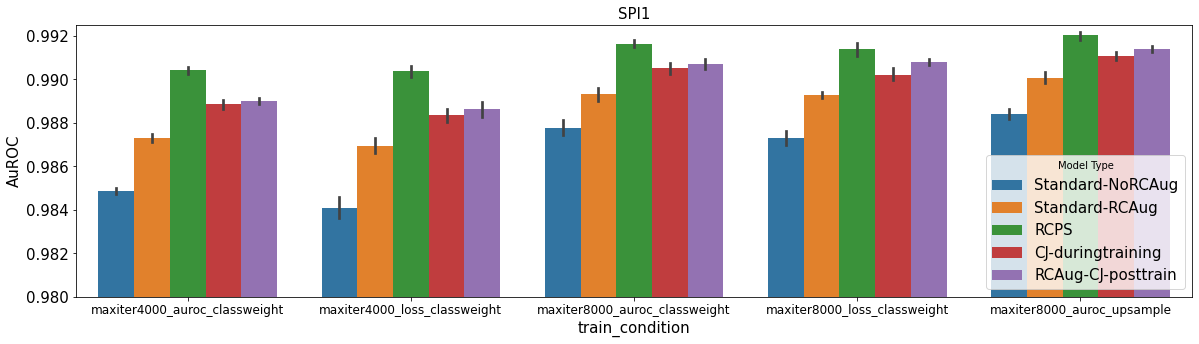

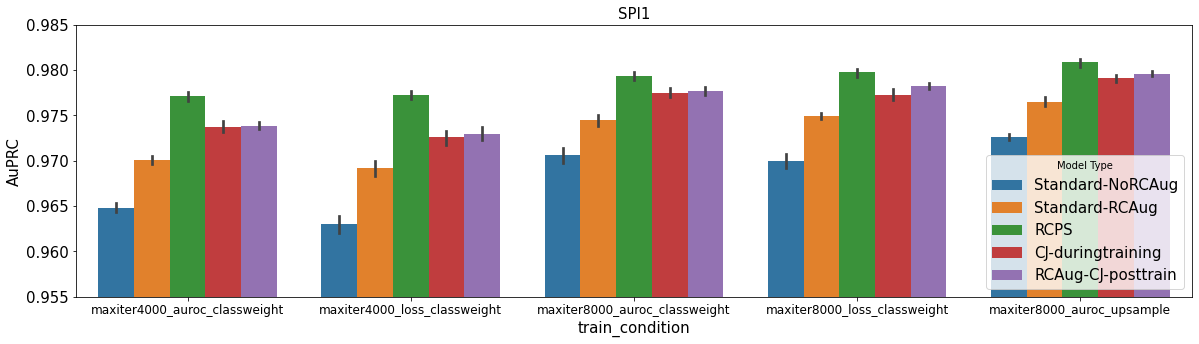

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

def get_pd(dataset, suffix): 
  result = pd.read_csv('%s_%s.csv' % (dataset, str(suffix)))
  result["dataset"] = dataset
  return result

def get_binary_dataset(suffix):
  MAX_dataset = get_pd("MAX", suffix)
  CTCF_dataset = get_pd("CTCF", suffix)
  SPI1_dataset = get_pd("SPI1", suffix)
  return pd.concat([MAX_dataset, CTCF_dataset, SPI1_dataset])

def get_all_binary_data():
  binary_80 = get_binary_dataset("80")
  binary_80["Imbalance"] = "classweight"
  binary_80["epochs"] = "maxiter4000"
  binary_160 = get_binary_dataset("160")
  binary_160["Imbalance"] = "classweight"
  binary_160["epochs"] = "maxiter8000"
  binary_upsample = get_binary_dataset("upsample_160")
  binary_upsample["Early Stopping Metric"] = "auroc"
  binary_upsample["epochs"] = "maxiter8000"
  
  to_return = pd.concat([binary_80, binary_160, binary_upsample])

  to_return["train_condition"] = (to_return["epochs"]+"_"
        +to_return["Early Stopping Metric"]+"_"+ to_return["Imbalance"])
  
  # to_return["train_condition"] = to_return["train_condition"].replace("maxiter8000_auroc_class_weight", "maxiter8000_auroc_classweight")
  #to_return["train_condition"] = ["maxiter8000_auroc_classweight" if x=="maxiter8000_auroc_class_weight" else x
  #                                for x in to_return["train_condition"]] 


  print(set(to_return['Model Type']))
  #remap the "Model Type" names
  # name_remap = {'Standard': 'Standard-NoRCAug',
  #               'AugWithin': 'Standard-RCAug',
  #               'RCSumPoolBias': 'RCPS',
  #               'Siamese': 'CJ-trained',
  #               'NAugWithin': 'CJ-posthoc'}
  # to_return['Model Type'] = [name_remap.get(x, "other") for x
  #                            in to_return['Model Type']]
  return to_return

def plot_hyperparameter_effect(datasetname, pddataframe, y, ylim):
  #filter for the dataset
  plt.figure(figsize=(20,5))
  filtered_pddataframe = pddataframe[
      (pddataframe["dataset"]==datasetname)
      & (pddataframe["Model Type"].isin(MODEL_TYPES) )
      & (pddataframe["Imbalance"] != "class_weight")]
  
  sns.barplot(data=filtered_pddataframe,
              x="train_condition",
              y=y,
              hue="Model Type",
              hue_order=MODEL_TYPES)
  if (y=="Held-out AuROC"):
    plt.ylabel("AuROC")
  elif (y=="Held-out AuPRC"):
    plt.ylabel("AuPRC")
  plt.title(datasetname)
  plt.ylim(*ylim)

MODEL_TYPES = ["Standard-NoRCAug", "Standard-RCAug", "RCPS",
               "CJ-duringtraining", "RCAug-CJ-posthoc"]

#MODEL_TYPES = ["Standard", "RCSumPool", "Siamese", "AugWithin", "NAugWithin"]
binary_data = get_all_binary_data()

# #Lessons: Combo of early stopping using loss and 80 epochs makes Siamese/Aug/NAug look weak (but high variance)
# #With just 80 epochs and early stopping with auroc, AugWithin and NAug look weak but siamese is ok
# #Under upsampling, NAug pulls ahead of Siamese and the others
plot_hyperparameter_effect(datasetname="MAX",
                           pddataframe=binary_data,
                           y="Held-out AuROC",
                           ylim=(0.9, 0.94))
plt.savefig("MAX_hyperparam_AuROC.png", bbox_inches='tight')
#Generally consistent pattern as for auROC
plot_hyperparameter_effect(datasetname="MAX",
                           pddataframe=binary_data,
                           y="Held-out AuPRC",
                           ylim=(0.57, 0.745))
plt.savefig("MAX_hyperparam_AuPRC.png", bbox_inches='tight')
#Relative rankings consistent
plot_hyperparameter_effect(datasetname="CTCF",
                           pddataframe=binary_data,
                           y="Held-out AuROC",
                           ylim=(0.965, 0.99))
plt.savefig("CTCF_hyperparam_AuROC.png", bbox_inches='tight')
plot_hyperparameter_effect(datasetname="CTCF",
                           pddataframe=binary_data,
                           y="Held-out AuPRC",
                           ylim=(0.93, 0.98))
plt.savefig("CTCF_hyperparam_AuPRC.png", bbox_inches='tight')
#Relative rankings consistent
plot_hyperparameter_effect(datasetname="SPI1",
                           pddataframe=binary_data,
                           y="Held-out AuROC",
                           ylim=(0.98, 0.9925))
plt.savefig("SPI1_hyperparam_AuROC.png", bbox_inches='tight')
plot_hyperparameter_effect(datasetname="SPI1",
                           pddataframe=binary_data,
                           y="Held-out AuPRC",
                           ylim=(0.955, 0.985))
plt.savefig("SPI1_hyperparam_AuPRC.png", bbox_inches='tight')

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

def get_pd_ISMB(dataset, suffix): 
  result = pd.read_csv('%s_%s.csv' % (dataset, str(suffix)))
  result["dataset"] = dataset
  return result

def get_binary_dataset_ISMB(suffix):
  MAX_dataset = get_pd_ISMB("MAX", suffix)
  CTCF_dataset = get_pd_ISMB("CTCF", suffix)
  SPI1_dataset = get_pd_ISMB("SPI1", suffix)
  pddataframe = pd.concat([MAX_dataset, CTCF_dataset, SPI1_dataset])

  name_remap = {'Standard-NoRCAug': 'Standard-NoRCAug',
              'Standard-RCAug': 'Standard-RCAug',
              'RCPS-Sum': 'RCPS',
              'RCPS-Avg': 'RCPS-Avg',
              'CJ-trained': 'CJ-trained',
              'CJ-trained-max': 'CJ-trained-max',
              'CJ-posthoc': 'CJ-posthoc',
              "CJ-posthoc-postsigmoid": "CJ-posthoc-postsigmoid",  
              'CJRCPS-early': "CJRCWrapper-1,2", 
              "CJRCPS-later": "CJRCWrapper-2,3", 
              "CJRCPS-all": "CJRCWrapper-1,2,3"}
                
  pddataframe['Model Type'] = [name_remap.get(x, "other") for x 
                               in pddataframe['Model Type']] 
  return pddataframe 
  
def get_all_binary_data_ISMB(suffix):
  binary_upsample = get_binary_dataset_ISMB(suffix)
  binary_upsample["Early Stopping Metric"] = "auroc"
  binary_upsample["epochs"] = "maxiter8000"
  binary_upsample["train_condition"] = (binary_upsample["epochs"]+"_"
        +binary_upsample["Early Stopping Metric"]+"_"+ binary_upsample["Imbalance"])
  return binary_upsample

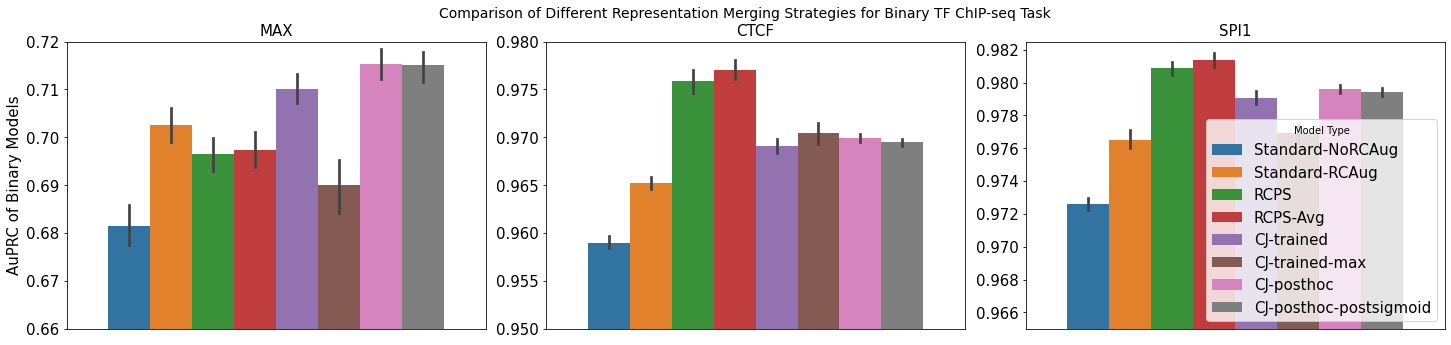

In [ ]:
# binary_data = get_all_binary_data_ISMB(suffix = "ISMB_1")
# MODEL_TYPES = ["Standard-NoRCAug", "Standard-RCAug", "RCPS",
#                "CJ-trained", "CJ-trained-max", "CJ-posthoc"]
binary_data = get_all_binary_data_ISMB(suffix = "ISMB_all")
# MODEL_TYPES = ["Standard-NoRCAug", "Standard-RCAug", "RCPS-Sum", 
#                "RCPS-Avg", "CJ-trained", "CJ-trained-max", 
#                "CJ-posthoc", "CJ-posthoc-postsigmoid", 
#                "CJRCPS-early", "CJRCPS-later", "CJRCPS-all"]
MODEL_TYPES = ["Standard-NoRCAug", "Standard-RCAug", "RCPS", "RCPS-Avg",
               "CJ-trained", "CJ-trained-max", 
               "CJ-posthoc", "CJ-posthoc-postsigmoid"]

def plot_master_figure(datasetname, pddataframe, y, ylim):
  #filter for the dataset
  filtered_pddataframe = pddataframe[((pddataframe["dataset"]==datasetname)
      & (pddataframe["Model Type"].isin(MODEL_TYPES)) 
      & (pddataframe['Imbalance'] == "upsample"))]
  sns.barplot(data=filtered_pddataframe,
              x="train_condition",
              y=y,
              hue="Model Type",
              hue_order=MODEL_TYPES)
  plt.ylim(*ylim)
  plt.title(datasetname)
  plt.xlabel("")
  x = []
  plt.xticks(x, " ")


fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle("Comparison of Different Representation Merging Strategies for Binary TF ChIP-seq Task", fontsize=14)
fig.tight_layout(w_pad=2, rect=[0, 0, 1, 0.93])
plt.axes(ax[0])
plot_master_figure(datasetname="MAX",
                           pddataframe=binary_data,
                           y="Held-out AuPRC",
                           ylim=(0.66, 0.72))
                          #  ylim=(0.55, 0.73))
plt.axes(ax[1])
plot_master_figure(datasetname="CTCF",
                   pddataframe=binary_data,
                   y="Held-out AuPRC",
                   ylim=(0.95, 0.98))
                          #  ylim=(0.85, 0.98))
plt.axes(ax[2])
plot_master_figure(datasetname="SPI1",
                   pddataframe=binary_data,
                   y="Held-out AuPRC",
                   ylim=(0.965, 0.9825))
                          #  ylim=(0.9, 0.9825))
[x.get_legend().remove() for x in ax[:-1]]
ax[0].set_ylabel("AuPRC of Binary Models")
[x.set_ylabel("") for x in ax[1:]]
plt.savefig("Binary_Merging_Strategies_AuPRC.png", bbox_inches='tight')

In [ ]:
# binary_data

,Unnamed: 0,Model Type,Held-out AuROC,Held-out AuPRC,Imbalance,dataset,Early Stopping Metric,epochs,train_condition
0,0,Standard-NoRCAug,0.918903,0.678227,upsample,MAX,auroc,maxiter8000,maxiter8000_auroc_upsample
1,1,Standard-RCAug,0.928208,0.698989,upsample,MAX,auroc,maxiter8000,maxiter8000_auroc_upsample
2,2,RCPS-Sum,0.922711,0.687984,upsample,MAX,auroc,maxiter8000,maxiter8000_auroc_upsample
3,3,RCPS-Avg,0.926345,0.690688,upsample,MAX,auroc,maxiter8000,maxiter8000_auroc_upsample
4,4,CJ-trained,0.930107,0.717383,upsample,MAX,auroc,maxiter8000,maxiter8000_auroc_upsample
...,...,...,...,...,...,...,...,...,...
105,105,CJ-posthoc,0.991414,0.979611,upsample,SPI1,auroc,maxiter8000,maxiter8000_auroc_upsample
106,106,CJ-posthoc-postsigmoid,0.991245,0.979415,upsample,SPI1,auroc,maxiter8000,maxiter8000_auroc_upsample
107,107,CJRCPS-early,0.983950,0.951932,upsample,SPI1,auroc,maxiter8000,maxiter8000_auroc_upsample
108,108,CJRCPS-later,0.985571,0.968293,upsample,SPI1,auroc,maxiter8000,maxiter8000_auroc_upsample


In [ ]:
# name_remap = {'Standard-NoRCAug': 'Standard-NoRCAug',
#               'Standard-RCAug': 'Standard-RCAug',
#               'RCPS-Sum': 'RCPS',
#               'RCPS-Avg': 'RCPS-Avg',
#               'CJ-trained': 'CJ-trained',
#               'CJ-trained-max': 'CJ-trained-max',
#               'CJ-posthoc': 'CJ-posthoc',
#               "CJ-posthoc-postsigmoid": "CJ-posthoc-postsigmoid",  
#               'CJRCPS-early': "CJRCWrapper-1,2", 
#               "CJRCPS-later": "CJRCWrapper-2,3", 
#               "CJRCPS-all": "CJRCWrapper-1,2,3"}
# #   # print(pddataframe.to_string())
# binary_data['Model Type'] = [name_remap.get(x, "other") for x 
#                               in binary_data['Model Type']] 

In [ ]:
# MODEL_TYPES = ["RCPS", "RCPS-Avg", "CJ-trained", "CJ-posthoc",
#                "CJRCWrapper-1,2", "CJRCWrapper-2,3", "CJRCWrapper-1,2,3"]
# filtered_pddataframe = binary_data[((binary_data["dataset"]=="CTCF")
#     & (binary_data["Model Type"].isin(MODEL_TYPES)) 
#     & (binary_data['Imbalance'] == "upsample"))]

In [ ]:
# filtered_pddataframe

,Unnamed: 0,Model Type,Held-out AuROC,Held-out AuPRC,Imbalance,dataset,Early Stopping Metric,epochs,train_condition
2,2,RCPS,0.989828,0.977340,upsample,CTCF,auroc,maxiter8000,maxiter8000_auroc_upsample
3,3,RCPS-Avg,0.988981,0.975522,upsample,CTCF,auroc,maxiter8000,maxiter8000_auroc_upsample
4,4,CJ-trained,0.985371,0.968013,upsample,CTCF,auroc,maxiter8000,maxiter8000_auroc_upsample
6,6,CJ-posthoc,0.986521,0.970681,upsample,CTCF,auroc,maxiter8000,maxiter8000_auroc_upsample
8,8,"CJRCWrapper-1,2",0.984166,0.967216,upsample,CTCF,auroc,maxiter8000,maxiter8000_auroc_upsample
...,...,...,...,...,...,...,...,...,...
103,103,CJ-trained,0.985196,0.969456,upsample,CTCF,auroc,maxiter8000,maxiter8000_auroc_upsample
105,105,CJ-posthoc,0.986123,0.969084,upsample,CTCF,auroc,maxiter8000,maxiter8000_auroc_upsample
107,107,"CJRCWrapper-1,2",0.984545,0.958758,upsample,CTCF,auroc,maxiter8000,maxiter8000_auroc_upsample
108,108,"CJRCWrapper-2,3",0.932112,0.884241,upsample,CTCF,auroc,maxiter8000,maxiter8000_auroc_upsample


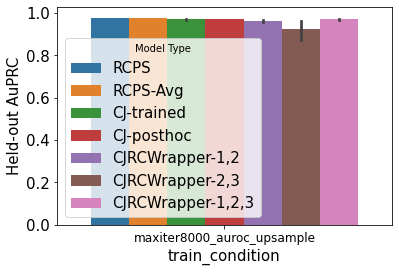

In [ ]:
# sns.barplot(data=filtered_pddataframe,
#           x="train_condition",
#           y="Held-out AuPRC",
#           hue="Model Type",
#           hue_order=MODEL_TYPES)

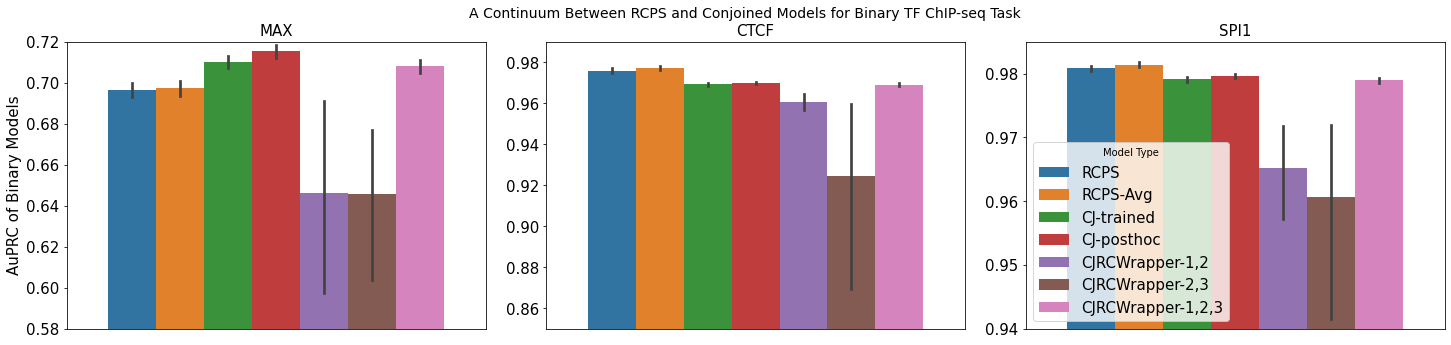

In [ ]:
# binary_data = get_all_binary_data_ISMB(suffix = "ISMB_1")
# MODEL_TYPES = ["Standard-NoRCAug", "Standard-RCAug", "RCPS",
#                "CJ-trained", "CJ-trained-max", "CJ-posthoc"]
binary_data = get_all_binary_data_ISMB(suffix = "ISMB_all")
# MODEL_TYPES = ["Standard-NoRCAug", "Standard-RCAug", "RCPS-Sum", 
#                "RCPS-Avg", "CJ-trained", "CJ-trained-max", 
#                "CJ-posthoc", "CJ-posthoc-postsigmoid", 
#                "CJRCPS-early", "CJRCPS-later", "CJRCPS-all"]
MODEL_TYPES = ["RCPS", "RCPS-Avg", "CJ-trained", "CJ-posthoc",
               "CJRCWrapper-1,2", "CJRCWrapper-2,3", "CJRCWrapper-1,2,3"]
# def plot_master_figure(datasetname, pddataframe, y, ylim):
#   #filter for the dataset

#   filtered_pddataframe = pddataframe[((pddataframe["dataset"]==datasetname)
#       & (pddataframe["Model Type"].isin(MODEL_TYPES)) 
#       & (pddataframe['Imbalance'] == "upsample"))]
#   sns.barplot(data=filtered_pddataframe,
#               x="train_condition",
#               y=y,
#               hue="Model Type",
#               hue_order=MODEL_TYPES)
#   plt.ylim(*ylim)
#   plt.title(datasetname)
#   plt.xlabel("")
#   x = []
#   plt.xticks(x, " ")

# plot_master_figure(datasetname="CTCF",
#                    pddataframe=binary_data,
#                    y="Held-out AuPRC",
#                    ylim=(0, 0.98))
#                           #  ylim=(0.85, 0.98))

fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle("A Continuum Between RCPS and Conjoined Models for Binary TF ChIP-seq Task", fontsize=14)
fig.tight_layout(w_pad=2, rect=[0, 0, 1, 0.93])
plt.axes(ax[0])
plot_master_figure(datasetname="MAX",
                           pddataframe=binary_data,
                           y="Held-out AuPRC",
                           ylim=(0.58, 0.72))
                          #  ylim=(0.55, 0.73))
plt.axes(ax[1])
plot_master_figure(datasetname="CTCF",
                   pddataframe=binary_data,
                   y="Held-out AuPRC",
                   ylim=(0.85, 0.99))
                          #  ylim=(0.85, 0.98))
plt.axes(ax[2])
plot_master_figure(datasetname="SPI1",
                   pddataframe=binary_data,
                   y="Held-out AuPRC",
                   ylim=(0.94, 0.985))
                          #  ylim=(0.9, 0.9825))
[x.get_legend().remove() for x in ax[:-1]]
ax[0].set_ylabel("AuPRC of Binary Models")
[x.set_ylabel("") for x in ax[1:]]
plt.savefig("Binary_CJRCPS_AuPRC.png", bbox_inches='tight')

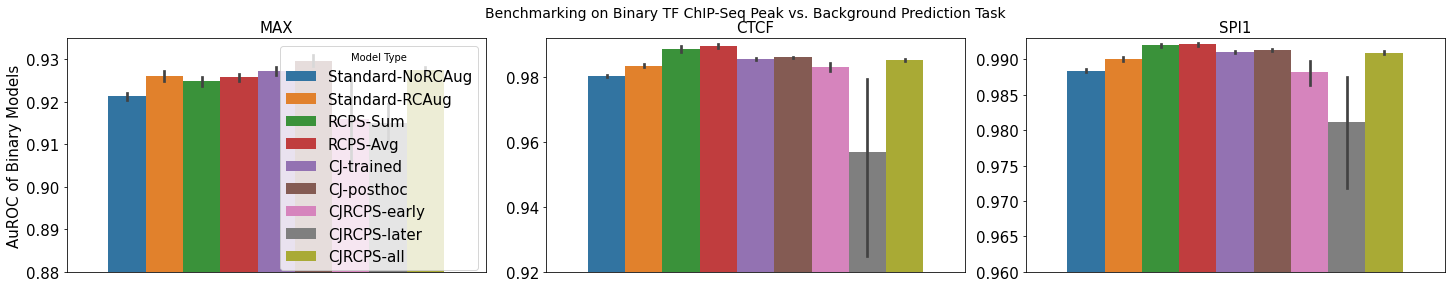

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,4.2))
fig.suptitle("Benchmarking on Binary TF ChIP-Seq Peak vs. Background Prediction Task", fontsize=14)
fig.tight_layout(w_pad=2, rect=[0, 0, 1, 0.93])
plt.axes(ax[0])
plot_master_figure(datasetname="MAX",
                           pddataframe=binary_data,
                           y="Held-out AuROC",
                           ylim=(0.88, 0.935))
plt.axes(ax[1])
plot_master_figure(datasetname="CTCF",
                           pddataframe=binary_data,
                           y="Held-out AuROC",
                           ylim=(0.92, 0.992))
plt.axes(ax[2])
plot_master_figure(datasetname="SPI1",
                           pddataframe=binary_data,
                           y="Held-out AuROC",
                           ylim=(0.96, 0.993))
[x.get_legend().remove() for x in ax[1:]]
ax[0].set_ylabel("AuROC of Binary Models")
[x.set_ylabel("") for x in ax[1:]]
# plt.savefig("retrain-CJRCPS-new-all-avg-AuROC.png", bbox_inches='tight')

#Profile Prediction Figures

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
# MODEL_TYPES = ['Standard-NoRCAug', 'Standard-RCAug', 'RCPS', 'RCPS-half', 'CJ-trained', 'CJ-posthoc', 'CJRCWrapper']
def get_pd_profile(dataset): 
  result = pd.read_csv('%s_ISMB_test.csv' % (dataset))
  result["dataset"] = dataset

  #remap the "Model Type" names
  name_remap = {'Standard-NoRCAug': 'Standard-NoRCAug',
                'Standard-RCAug': 'Standard-RCAug',
                'RCPS': 'RCPS',
                'RCPS-half': 'RCPS-half',
                'CJ-duringtraining': 'CJ-trained',
                'CJ-posthoc': 'CJ-posthoc', 
                'CJRCPS': 'CJRCWrapper'}
  result['Model Type'] = [name_remap.get(x, "other") for x
                             in result['Model Type']]

  return result

OCT4_dataset = get_pd_profile("OCT4")
SOX2_dataset = get_pd_profile("SOX2")
# KLF4_dataset = get_pd_profile("KLF4")
# NANOG_dataset = get_pd_profile("NANOG")


def plot_profile_figures(datasetname, pddataframe, y, ylim):
  #filter for the dataset
  
  filtered_pddataframe = pddataframe[(pddataframe["Model Type"].isin(MODEL_TYPES)) ]
  sns.barplot(data=filtered_pddataframe,
              x="dataset",
              y=y,
              hue="Model Type",
              hue_order=MODEL_TYPES)
  plt.ylim(*ylim)
  plt.title(datasetname)
  plt.xlabel("")
  x = []
  plt.xticks(x, " ")
  

#MODEL_TYPES = ["Standard", "AugWithin", "RevComp", "Siamese", "NAugWithin"]
MODEL_TYPES = ['Standard-NoRCAug', 'Standard-RCAug', 'RCPS', 'CJ-trained', 'CJ-posthoc']
def generate_profile_model_plots(y, friendly_y, ylims):
  # fig, ax = plt.subplots(1,4,figsize=(20,4))
  fig, ax = plt.subplots(1,2,figsize=(20,4))
  fig.suptitle("Benchmarking on Base-Pair Level ChIP-Nexus Signal Profile Prediction Task", fontsize=14)
  fig.tight_layout(w_pad=2, rect=[0, 0, 1, 0.93])
  plt.axes(ax[0])
  plot_profile_figures(datasetname = "OCT4", pddataframe = OCT4_dataset , y=y, ylim=ylims[0])
  plt.axes(ax[1])
  plot_profile_figures(datasetname = "SOX2", pddataframe = SOX2_dataset , y=y, ylim=ylims[1])
  # plt.axes(ax[2])
  # plot_profile_figures(datasetname = "KLF4", pddataframe = KLF4_dataset , y=y, ylim=ylims[2])
  # plt.axes(ax[3])
  # plot_profile_figures(datasetname = "NANOG",pddataframe = NANOG_dataset , y=y, ylim=ylims[3])

  if (y=="spear"):
    [x.get_legend().remove() for x in ax[:]]
  else:
    [x.get_legend().remove() for x in ax[:-1]]
  ax[0].set_ylabel(friendly_y)
  [x.set_ylabel("") for x in ax[1:]]
generate_profile_model_plots(y="spear",
                             friendly_y="Spearman Correlation\nof Predicted vs. True Profile",
                             ylims=[(0.29,.34),
                                    (0.27,.31),
                                    (0.34,.375),
                                    (0.39,.43)])

# # plt.savefig("MasterProfileModelsSpearman_ISMB.png", bbox_inches='tight')

generate_profile_model_plots(y="pears",
                             friendly_y="Pearson Correlation\nof Predicted vs. True Profile",
                             ylims=[(0.3,0.4),
                                    (0.35,0.42),
                                    (0.38,0.43),
                                    (0.45,0.65)])

# # plt.savefig("MasterProfileModelsPearson_ISMB.png", bbox_inches='tight')

generate_profile_model_plots(y="jsd",
                             friendly_y="Jenson-Shannon Divergence\nof Predicted vs. True Profile",
                             ylims=[(0.155,0.17),
                                    (0.21,0.23),
                                    (0.155,0.167),
                                    (0.14,0.22)])

# plt.savefig("MasterProfileModelsJSD_ISMB.png", bbox_inches='tight')

RCPS Half for Profile Prediction

In [ ]:
MODEL_TYPES = ['Standard-NoRCAug', 'Standard-RCAug', 'RCPS', 'RCPS-half', 'CJ-trained', 'CJ-posthoc']
def generate_profile_model_plots(y, friendly_y, ylims):
  # fig, ax = plt.subplots(1,4,figsize=(20,4))
  fig, ax = plt.subplots(1,2,figsize=(20,4))
  fig.suptitle("Performance Benchmarks of RCPS with Reduced Number of Filters for Base-Pair Level ChIP-Nexus Signal Profile Prediction Task", fontsize=14)
  fig.tight_layout(w_pad=2, rect=[0, 0, 1, 0.93])
  plt.axes(ax[0])
  plot_profile_figures(datasetname = "OCT4", pddataframe = OCT4_dataset , y=y, ylim=ylims[0])
  plt.axes(ax[1])
  plot_profile_figures(datasetname = "SOX2", pddataframe = SOX2_dataset , y=y, ylim=ylims[1])
  # plt.axes(ax[2])
  # plot_profile_figures(datasetname = "KLF4", pddataframe = KLF4_dataset , y=y, ylim=ylims[2])
  # plt.axes(ax[3])
  # plot_profile_figures(datasetname = "NANOG",pddataframe = NANOG_dataset , y=y, ylim=ylims[3])

  if (y=="spear"):
    [x.get_legend().remove() for x in ax[:]]
  else:
    [x.get_legend().remove() for x in ax[:-1]]
  ax[0].set_ylabel(friendly_y)
  [x.set_ylabel("") for x in ax[1:]]
generate_profile_model_plots(y="spear",
                             friendly_y="Spearman Correlation\nof Predicted vs. True Profile",
                             ylims=[(0.29,.34),
                                    (0.27,.31),
                                    (0.34,.375),
                                    (0.39,.43)])

# # plt.savefig("MasterProfileModelsSpearman_RCPS_Half_ISMB.png", bbox_inches='tight')

generate_profile_model_plots(y="pears",
                             friendly_y="Pearson Correlation\nof Predicted vs. True Profile",
                             ylims=[(0.3,0.4),
                                    (0.35,0.42),
                                    (0.38,0.43),
                                    (0.45,0.65)])

# # plt.savefig("MasterProfileModelsPearson_RCPS_Half_ISMB.png", bbox_inches='tight')

generate_profile_model_plots(y="jsd",
                             friendly_y="Jenson-Shannon Divergence\nof Predicted vs. True Profile",
                             ylims=[(0.155,0.17),
                                    (0.21,0.23),
                                    (0.155,0.167),
                                    (0.14,0.22)])

# plt.savefig("MasterProfileModelsJSD_RCPS_Half_ISMB.png", bbox_inches='tight')

Test Train for Profile Prediction

#SOX2

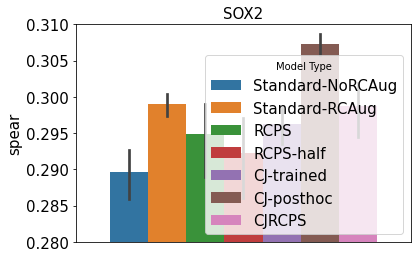

In [ ]:
plot_profile_figures(datasetname = "SOX2", pddataframe = SOX2_dataset , y="spear", ylim=[0.28, 0.31])
plt.savefig("SOX2_Spearman_CJRCPS.png", bbox_inches='tight')

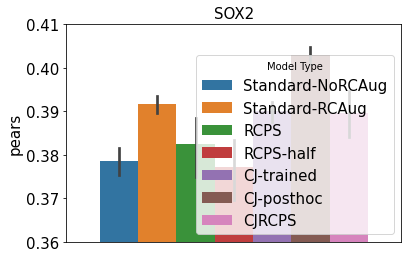

In [ ]:
plot_profile_figures(datasetname = "SOX2", pddataframe = SOX2_dataset , y="pears", ylim=[0.36, 0.41])
plt.savefig("SOX2_Pearson_CJRCPS.png", bbox_inches='tight')

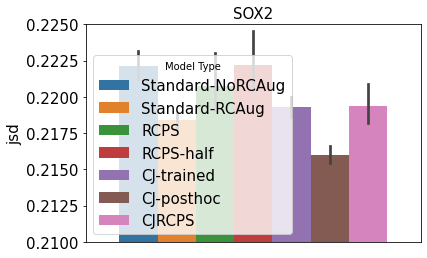

In [ ]:
plot_profile_figures(datasetname = "SOX2", pddataframe = SOX2_dataset , y="jsd", ylim=[0.21, 0.225])
plt.savefig("SOX2_JSD_CJRCPS.png", bbox_inches='tight')

#OCT4

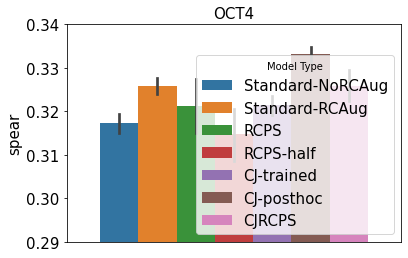

In [ ]:
plot_profile_figures(datasetname = "OCT4", pddataframe = OCT4_dataset , y="spear", ylim=[0.29, 0.34])
plt.savefig("OCT4_Spearman_CJRCPS.png", bbox_inches='tight')

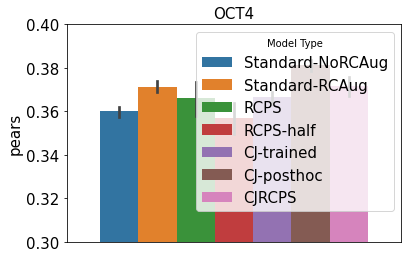

In [ ]:
plot_profile_figures(datasetname = "OCT4", pddataframe = OCT4_dataset , y="pears", ylim=[0.3, 0.4])
plt.savefig("OCT4_Pearson_CJRCPS.png", bbox_inches='tight')

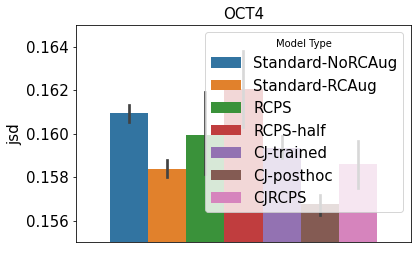

In [ ]:
plot_profile_figures(datasetname = "OCT4", pddataframe = OCT4_dataset , y="jsd", ylim=[0.155,0.165])
plt.savefig("OCT4_JSD_CJRCPS.png", bbox_inches='tight')

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

def get_sim_dataset(seqlen):
  to_return = pd.read_csv("sim_"+str(seqlen)+".csv")
  #remap the "Model Type" names
  print(set(to_return['Model Type']))
  name_remap = {'Standard': 'Standard-NoRCAug',
                'AugWithin': 'Standard-RCAug',
                'RC': 'RCPS',
                'Siamese': 'CJ-trained',
                'NAugWithin': 'CJ-posthoc'}
  to_return['Model Type'] = [name_remap.get(x, "other") for x
                             in to_return['Model Type']]
  return to_return           

sim_200 = get_sim_dataset(200)
sim_1000 = get_sim_dataset(1000)

{'AugOutside', 'NAugOutside', 'NStandard', 'Standard', 'NAugWithin', 'Siamese', 'AugOutsideDouble', 'AugWithin', 'NAugOutsideDouble', 'RC'}
{'AugOutside', 'NAugOutside', 'NStandard', 'Standard', 'NAugWithin', 'Siamese', 'AugOutsideDouble', 'AugWithin', 'NAugOutsideDouble', 'RC'}


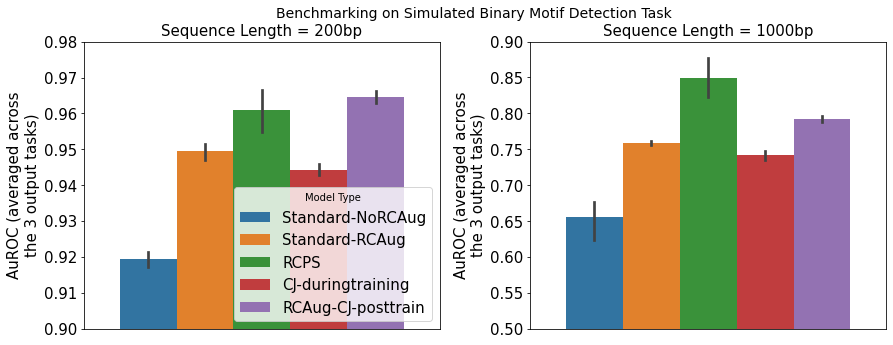

In [ ]:
def plot_sim_figures(datasetname, pddataframe, y, ylim):
  #filter for the dataset
  filtered_pddataframe = pddataframe[(pddataframe["Model Type"].isin(MODEL_TYPES) & 
                                      (pddataframe["Early Stopping Metric"] == "auroc")) ]
  sns.barplot(data=filtered_pddataframe,
              x="Early Stopping Metric",
              y=y,
              hue="Model Type",
              hue_order=MODEL_TYPES)
  plt.ylim(*ylim)
  if (datasetname=="sim 200"):
    plt.title("Sequence Length = 200bp")
  elif (datasetname=="sim 1000"):
    plt.title("Sequence Length = 1000bp")
  plt.xlabel("")
  x = []
  plt.xticks(x, " ")
  plt.ylabel("AuROC (averaged across\nthe 3 output tasks)")
    
  
fig, ax = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("Benchmarking on Simulated Binary Motif Detection Task", fontsize=14)
fig.tight_layout(w_pad=5, rect=[0, 0, 1, 0.93])
plt.axes(ax[0])
plot_sim_figures(datasetname = "sim 200", pddataframe = sim_200 , y = "Held-out AuROC", ylim = (0.9,0.98))
plt.axes(ax[1])
plot_sim_figures(datasetname = "sim 1000", pddataframe = sim_1000 , y = "Held-out AuROC", ylim = (0.5,0.9))
ax[1].get_legend().remove()

plt.savefig("MasterSimAuROC.png", bbox_inches='tight')

In [ ]:
from google.colab import files
import glob
[files.download(x) for x in glob.glob("*.png")]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[None, None, None, None, None, None, None]

# TRAIN TEST BENCHMARKING

Binary Models

In [ ]:
def plot_profile_figures(datasetname, pddataframe, y, ylim):
  #filter for the dataset
  filtered_pddataframe = pddataframe[(pddataframe["Model Type"].isin(MODEL_TYPES)) ]
  sns.barplot(data=filtered_pddataframe,
              x="Model Type",
              y=y,
              hue="Train or Test")
  plt.ylim(*ylim)
  plt.title(datasetname)
  # plt.xlabel("")
  # x = []
  # plt.xticks(x, " ")
  
MODEL_TYPES = ["RCPS","CJ-trained", "CJ-posthoc"]

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
def get_pd_binary_train_test(dataset, suffix): 
  result = pd.read_csv('%s_%s.csv' % (dataset, suffix))
  result["dataset"] = dataset

  #remap the "Model Type" names
  name_remap = {'Standard-NoRCAug': 'Standard-NoRCAug',
                'RCPS': 'RCPS',
                'CJ-duringtraining': 'CJ-trained',
                'RCAug-CJ-posthoc': 'CJ-posthoc'}
  result['Model Type'] = [name_remap.get(x, "other") for x
                             in result['Model Type']]

  return result

In [ ]:
CTCF_df = get_pd_binary_train_test("CTCF", "train_test")
MAX_df = get_pd_binary_train_test("MAX", "train_test")
SPI1_df = get_pd_binary_train_test("SPI1", "train_test")

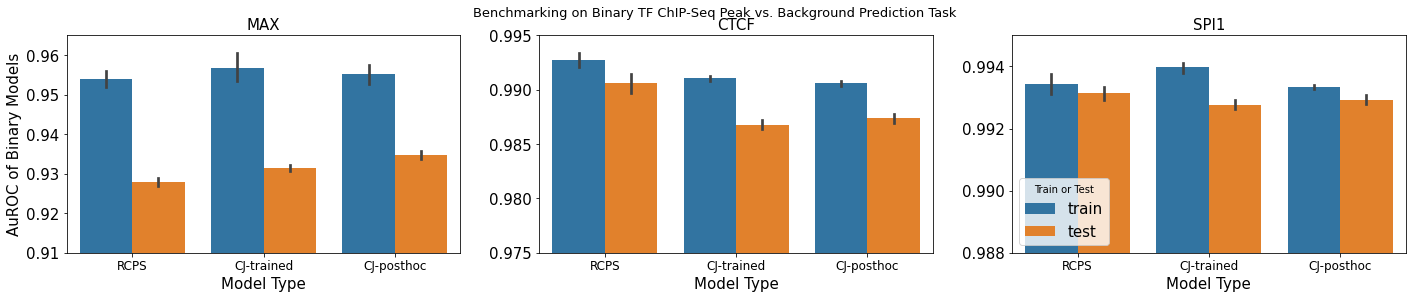

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(24,4))
# plt.figure(figsize=(15,10))
fig.suptitle("Benchmarking on Binary TF ChIP-Seq Peak vs. Background Prediction Task", fontsize=13)
y = "Held-out AuROC"
plt.axes(ax[0])
plot_profile_figures(datasetname = "MAX", pddataframe = MAX_df, y = y, ylim = (0.91, 0.965))

plt.axes(ax[1])
plot_profile_figures(datasetname = "CTCF", pddataframe = CTCF_df, y = y, ylim = (0.975, 0.995))

plt.axes(ax[2])
plot_profile_figures(datasetname = "SPI1", pddataframe = SPI1_df, y = y, ylim = (0.988, 0.995))

[x.get_legend().remove() for x in ax[:-1]]
ax[0].set_ylabel("AuROC of Binary Models")
[x.set_ylabel("") for x in ax[1:]]
plt.savefig("MasterTFBinaryModels_TrainTest_AuROC.png", bbox_inches='tight')

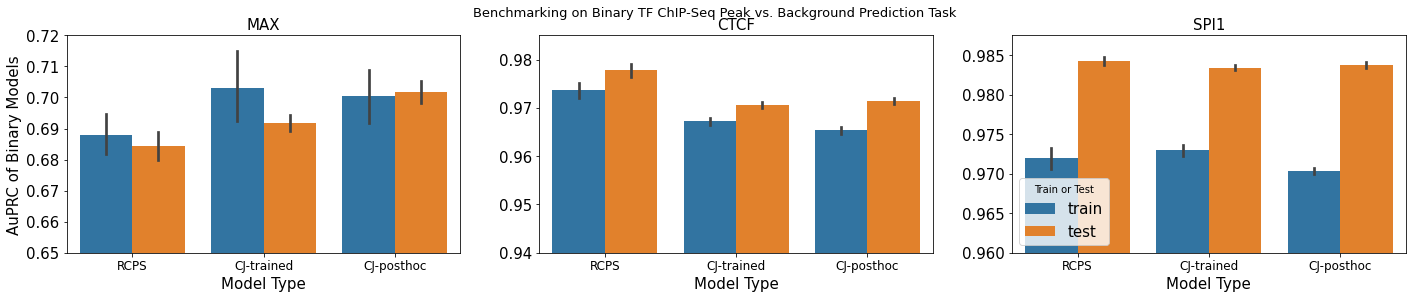

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(24,4))
# plt.figure(figsize=(15,10))
y = "Held-out AuPRC"
fig.suptitle("Benchmarking on Binary TF ChIP-Seq Peak vs. Background Prediction Task", fontsize=13)
plt.axes(ax[0])
plot_profile_figures(datasetname = "MAX", pddataframe = MAX_df, y = y, ylim = (0.65, 0.72))

plt.axes(ax[1])
plot_profile_figures(datasetname = "CTCF", pddataframe = CTCF_df, y = y, ylim = (0.94, 0.985))

plt.axes(ax[2])
plot_profile_figures(datasetname = "SPI1", pddataframe = SPI1_df, y = y, ylim = (0.96, 0.9875))

[x.get_legend().remove() for x in ax[:-1]]
ax[0].set_ylabel("AuPRC of Binary Models")
[x.set_ylabel("") for x in ax[1:]]

plt.savefig("MasterTFBinaryModels_TrainTest_AuPRC.png", bbox_inches='tight')

PROFILE MODELS

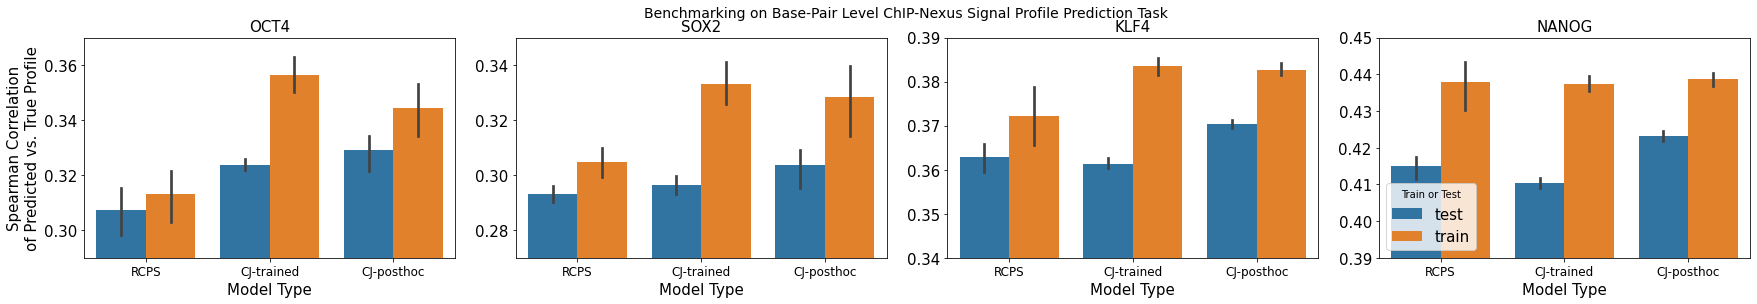

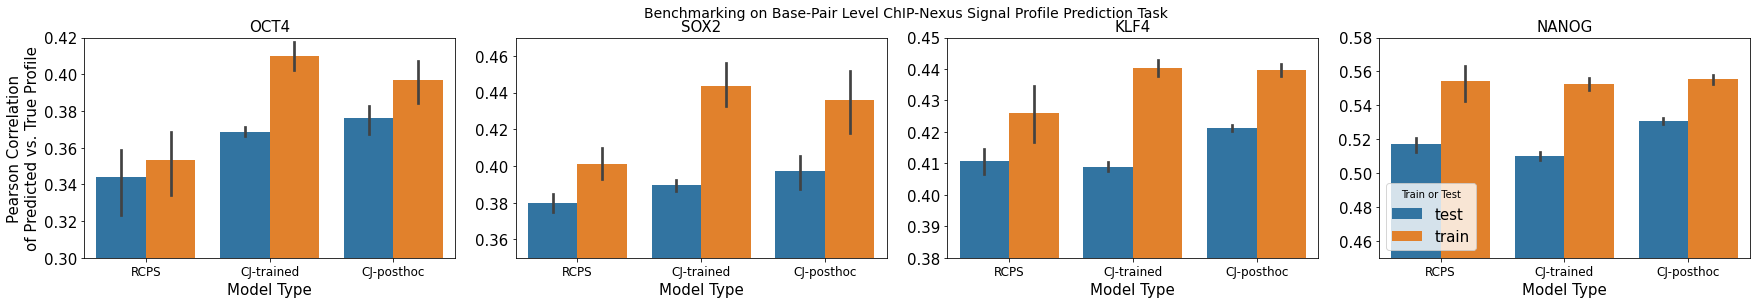

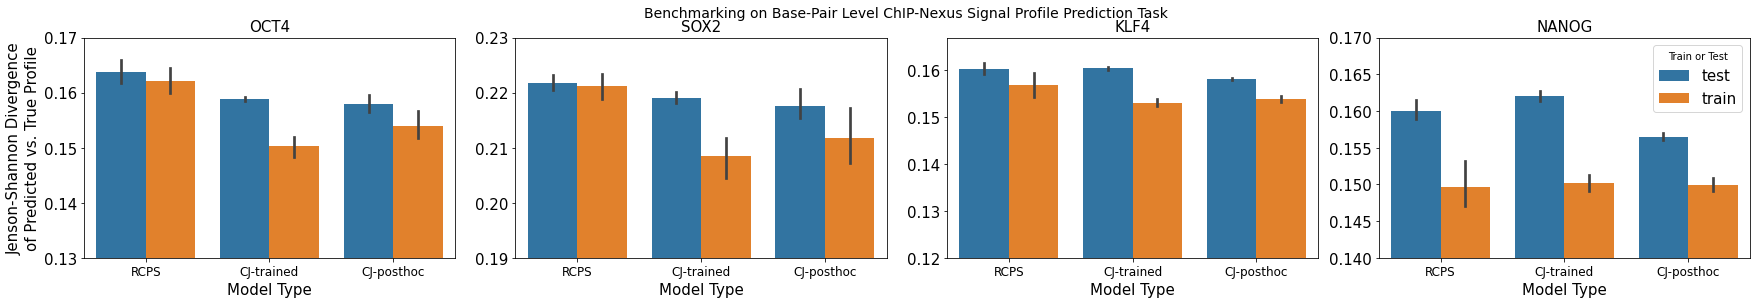

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

def get_pd_profile(dataset, suffix): 
  result = pd.read_csv('%s_%s.csv' % (dataset, suffix))
  result["dataset"] = dataset

  #remap the "Model Type" names
  name_remap = {'Standard': 'Standard-NoRCAug',
                'AugWithin': 'Standard-RCAug',
                'RevComp': 'RCPS',
                'RCPS': 'RCPS',
                'Siamese': 'CJ-trained',
                'NAugWithin': 'CJ-posthoc'}
  result['Model Type'] = [name_remap.get(x, "other") for x
                             in result['Model Type']]

  return result

OCT4_test_dataset = get_pd_profile("OCT4", "new_metrics")
OCT4_test_dataset["Train or Test"] = "test"
SOX2_test_dataset = get_pd_profile("SOX2", "new_metrics")
SOX2_test_dataset["Train or Test"] = "test"
KLF4_test_dataset = get_pd_profile("KLF4", "new_metrics")
KLF4_test_dataset["Train or Test"] = "test"
NANOG_test_dataset = get_pd_profile("NANOG", "new_metrics")
NANOG_test_dataset["Train or Test"] = "test"


OCT4_train_dataset = get_pd_profile("OCT4", "train")
OCT4_train_dataset["Train or Test"] = "train"
SOX2_train_dataset = get_pd_profile("SOX2", "train")
SOX2_train_dataset["Train or Test"] = "train"
KLF4_train_dataset = get_pd_profile("KLF4", "train")
KLF4_train_dataset["Train or Test"] = "train"
NANOG_train_dataset = get_pd_profile("NANOG", "train")
NANOG_train_dataset["Train or Test"] = "train"

OCT4_full_dataset = pd.concat([OCT4_test_dataset, OCT4_train_dataset])
SOX2_full_dataset = pd.concat([SOX2_test_dataset, SOX2_train_dataset])
KLF4_full_dataset = pd.concat([KLF4_test_dataset, KLF4_train_dataset])
NANOG_full_dataset = pd.concat([NANOG_test_dataset, NANOG_train_dataset])

def generate_profile_model_plots(y, friendly_y, ylims):
  fig, ax = plt.subplots(1,4,figsize=(24,4))
  fig.suptitle("Benchmarking on Base-Pair Level ChIP-Nexus Signal Profile Prediction Task", fontsize=14)
  fig.tight_layout(w_pad=2, rect=[0, 0, 1, 0.93])
  plt.axes(ax[0])
  plot_profile_figures(datasetname = "OCT4", pddataframe = OCT4_full_dataset , y=y, ylim=ylims[0])
  plt.axes(ax[1])
  plot_profile_figures(datasetname = "SOX2", pddataframe = SOX2_full_dataset , y=y, ylim=ylims[1])
  plt.axes(ax[2])
  plot_profile_figures(datasetname = "KLF4", pddataframe = KLF4_full_dataset , y=y, ylim=ylims[2])
  plt.axes(ax[3])
  plot_profile_figures(datasetname = "NANOG",pddataframe = NANOG_full_dataset , y=y, ylim=ylims[3])

  if (y=="x"):
    [x.get_legend().remove() for x in ax[:]]
  else:
    [x.get_legend().remove() for x in ax[:-1]]
  ax[0].set_ylabel(friendly_y)
  [x.set_ylabel("") for x in ax[1:]]

generate_profile_model_plots(y="spear",
                             friendly_y="Spearman Correlation\nof Predicted vs. True Profile",
                             ylims=[(0.29,.37),
                                    (0.27,.35),
                                    (0.34,.39),
                                    (0.39,.45)])

plt.savefig("MasterProfileModelsSpearmanTestTrain.png", bbox_inches='tight')

generate_profile_model_plots(y="pears",
                             friendly_y="Pearson Correlation\nof Predicted vs. True Profile",
                             ylims=[(0.3,0.42),
                                    (0.35,0.47),
                                    (0.38,0.45),
                                    (0.45,0.58)])

plt.savefig("MasterProfileModelsPearsonTestTrain.png", bbox_inches='tight')

generate_profile_model_plots(y="jsd",
                             friendly_y="Jenson-Shannon Divergence\nof Predicted vs. True Profile",
                             ylims=[(0.13,0.17),
                                    (0.19,0.23),
                                    (0.12,0.167),
                                    (0.14,0.17)])

plt.savefig("MasterProfileModelsJSDTestTrain.png", bbox_inches='tight')

In [ ]:
OCT4_full_dataset

,Unnamed: 0,Model Type,seed,jsd,pears,spear,dataset,Train or Test
0,0,RCPS,1535,0.163293,0.349745,0.308800,OCT4,test
1,1,CJ-trained,1535,0.159375,0.365360,0.320566,OCT4,test
2,2,Standard-NoRCAug,1535,0.160675,0.360338,0.316436,OCT4,test
3,3,Standard-RCAug,1535,0.157300,0.375518,0.329217,OCT4,test
4,4,CJ-posthoc,1535,0.155364,0.386732,0.337424,OCT4,test
...,...,...,...,...,...,...,...,...
45,45,Standard-NoRCAug,9295,0.150289,0.407748,0.353761,OCT4,train
46,46,Standard-RCAug,9295,0.151706,0.408328,0.353262,OCT4,train
47,47,other,9295,0.161528,0.361646,0.316484,OCT4,train
48,48,CJ-trained,9295,0.146640,0.423907,0.367570,OCT4,train
